<a href="https://colab.research.google.com/github/6hAkunAmAtAtA9/Neural_pathway/blob/main/2_Number_sequences.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import matplotlib.pyplot as plt 

В этой задаче я буду тренировать нейросети определять закономерности в числа. Нейросети на вход подается три числа; цель - определить три закономерности в числах (рост, уменьшение, равенство двух чисел) либо отсутствие закономерностей.

In [24]:
# Здесь я создал функцию для генерации данных
def list_generation(list_size=100):
  x_train = np.around(np.random.random(size=(list_size, 3)), decimals=1)
  y_train, y_labels = [], []

  for elem in x_train:
    if elem[0] < elem[1] < elem[2]: # GROW
      y_train.append([1, 0, 0, 0])
      y_labels.append('GROW')
    elif elem[0] > elem[1] > elem[2]: # REDUCE
      y_train.append([0, 1, 0, 0])
      y_labels.append('REDUCE')
    elif elem[0] == elem[1] or elem[1] == elem[2] or elem[0] == elem[2]: # EQUAL
      y_train.append([0, 0, 1, 0])
      y_labels.append('EQUAL')
    else:
      y_train.append([0, 0, 0, 1])
      y_labels.append('NOTHING')
  y_train = np.array(y_train); y_labels = np.array(y_labels)
  return x_train, y_train, y_labels

In [25]:
x_train, y_train, y_labels = list_generation(500)
x_test, y_test, y__test_labels = list_generation(20)

In [26]:
hidden_size = 10
weights_i_h = np.random.random(size=(hidden_size, len(x_train[0]))) - 0.5
weights_h_o = np.random.random(size=(len(y_test[0]), hidden_size)) - 0.5

In [27]:
alpha = 0.0001
iterations = 1000
total_err = []
flag = True

for iteration in range(iterations):
  error = 0
  for id in range(len(x_train)):
    input = np.reshape(x_train[id], (len(x_train[id]), 1))
    layer_1 = np.dot(weights_i_h, input) 
    output = np.dot(weights_h_o, layer_1) 
    error += np.sum((np.reshape(y_train[id], (len(y_train[id]), 1)) - output) ** 2)
    delta_out = np.reshape(y_train[id], (len(y_train[id]), 1)) - output
    delta_h = np.dot(weights_h_o.T, delta_out) * layer_1
    weights_h_o += alpha * np.dot(delta_out, layer_1.T)
    weights_i_h += alpha * np.dot(delta_h, input.T)

  total_err.append(error / len(x_train))
  if iteration % 100 == 0:
    print(f'ITER: {iteration}, ERR: {error / len(x_train)}')
  

ITER: 0, ERR: 1.2062277450686867
ITER: 100, ERR: 0.718724303762055
ITER: 200, ERR: 0.6810700464579811
ITER: 300, ERR: 0.6593039466444671
ITER: 400, ERR: 0.6475235327693449
ITER: 500, ERR: 0.6412858614810202
ITER: 600, ERR: 0.6379558846131983
ITER: 700, ERR: 0.6361295725869731
ITER: 800, ERR: 0.6350898341723883
ITER: 900, ERR: 0.6344738310924378


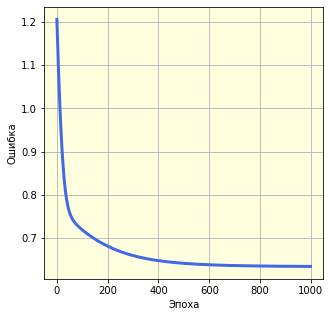

In [28]:
plt.figure(figsize=(5, 5))  
ax = plt.axes()
ax.set(facecolor = "LightYellow")

plt.plot(list(range(len(total_err))), total_err, color='RoyalBlue', linewidth=3,
          markeredgewidth=2, markersize=10, markevery=5)                               
                                    
plt.xlabel('Эпоха')                    
plt.ylabel('Ошибка')  
plt.grid()                       

In [29]:
for id in range(10):
  input = np.reshape(x_test[id], (len(x_test[id]), 1))
  layer_1 = np.dot(weights_i_h, input) 
  output = np.dot(weights_h_o, layer_1)
  error = np.sum((np.reshape(y_test[id], (len(y_test[id]), 1)) - output) ** 2)
  print(f'OUT: {np.around(output.T, decimals=2)}, ERR: {np.around(error, decimals=2)}, GOAL: {y_test[id]}')

OUT: [[-0.19  0.29  0.31  0.39]], ERR: 0.6, GOAL: [0 0 0 1]
OUT: [[0.08 0.16 0.24 0.37]], ERR: 0.49, GOAL: [0 0 0 1]
OUT: [[-0.14  0.37  0.44  0.58]], ERR: 0.95, GOAL: [0 1 0 0]
OUT: [[-0.14  0.32  0.41  0.55]], ERR: 0.5, GOAL: [0 0 0 1]
OUT: [[0.17 0.05 0.3  0.5 ]], ERR: 0.37, GOAL: [0 0 0 1]
OUT: [[ 0.38 -0.21  0.13  0.33]], ERR: 0.55, GOAL: [1 0 0 0]
OUT: [[ 0.46 -0.22  0.23  0.51]], ERR: 0.65, GOAL: [1 0 0 0]
OUT: [[-0.04  0.12  0.21  0.29]], ERR: 0.57, GOAL: [0 0 0 1]
OUT: [[ 0.35 -0.11  0.2   0.42]], ERR: 0.66, GOAL: [1 0 0 0]
OUT: [[-0.28  0.4   0.27  0.28]], ERR: 0.58, GOAL: [0 1 0 0]


То же самое только с RELU

In [30]:
def relu(x):
  return (x > 0) * x

def relu2deriv(output):
  return output > 0

In [31]:
hidden_size = 10
weights_i_h = np.random.random(size=(hidden_size, len(x_train[0]))) - 0.5
weights_h_o = np.random.random(size=(len(y_test[0]), hidden_size)) - 0.5

In [32]:
alpha = 0.001
iterations = 1000
total_err = []
flag = True

for iteration in range(iterations):
  error = 0
  for id in range(len(x_train)):
    input = np.reshape(x_train[id], (len(x_train[id]), 1))
    layer_1 = relu(np.dot(weights_i_h, input)) 
    output = np.dot(weights_h_o, layer_1) 
    error += np.sum((np.reshape(y_train[id], (len(y_train[id]), 1)) - output) ** 2)
    delta_out = np.reshape(y_train[id], (len(y_train[id]), 1)) - output
    delta_h = np.dot(weights_h_o.T, delta_out) * relu2deriv(layer_1)
    weights_h_o += alpha * np.dot(delta_out, layer_1.T)
    weights_i_h += alpha * np.dot(delta_h, input.T)

  total_err.append(error / len(x_train))
  if iteration % 100 == 0:
    print(f'ITER: {iteration}, ERR: {error / len(x_train)}')

ITER: 0, ERR: 1.0798644900357424
ITER: 100, ERR: 0.6058499081441949
ITER: 200, ERR: 0.5169907175877893
ITER: 300, ERR: 0.45758816256164386
ITER: 400, ERR: 0.4446713292580789
ITER: 500, ERR: 0.4397165517961452
ITER: 600, ERR: 0.43556393948748284
ITER: 700, ERR: 0.4323699116921608
ITER: 800, ERR: 0.42965826813580865
ITER: 900, ERR: 0.42708732863117654


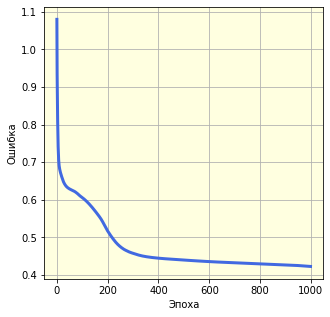

In [33]:
plt.figure(figsize=(5, 5))  
ax = plt.axes()
ax.set(facecolor = "LightYellow")

plt.plot(list(range(len(total_err))), total_err, color='RoyalBlue', linewidth=3,
          markeredgewidth=2, markersize=10, markevery=5)                               
                                    
plt.xlabel('Эпоха')                  
plt.ylabel('Ошибка')  
plt.grid()                    

In [34]:
for id in range(10):
  input = np.reshape(x_test[id], (len(x_test[id]), 1))
  layer_1 = relu(np.dot(weights_i_h, input)) #relu
  output = np.dot(weights_h_o, layer_1) # softmax
  error = np.sum((np.reshape(y_test[id], (len(y_test[id]), 1)) - output) ** 2)
  print(f'OUT: {np.around(output.T, decimals=2)}, ERR: {np.around(error, decimals=2)}, GOAL: {y_test[id]}')

OUT: [[0.01 0.23 0.24 0.68]], ERR: 0.22, GOAL: [0 0 0 1]
OUT: [[-0.03  0.09  0.1   0.96]], ERR: 0.02, GOAL: [0 0 0 1]
OUT: [[-0.09  0.54  0.55  0.2 ]], ERR: 0.57, GOAL: [0 1 0 0]
OUT: [[-0.13  0.22  0.4   0.73]], ERR: 0.3, GOAL: [0 0 0 1]
OUT: [[ 0.14 -0.    0.34  0.34]], ERR: 0.57, GOAL: [0 0 0 1]
OUT: [[0.67 0.07 0.05 0.04]], ERR: 0.12, GOAL: [1 0 0 0]
OUT: [[0.75 0.06 0.08 0.24]], ERR: 0.13, GOAL: [1 0 0 0]
OUT: [[-0.15 -0.07  0.09  0.75]], ERR: 0.1, GOAL: [0 0 0 1]
OUT: [[0.56 0.03 0.26 0.07]], ERR: 0.26, GOAL: [1 0 0 0]
OUT: [[ 0.12  0.81  0.12 -0.04]], ERR: 0.07, GOAL: [0 1 0 0]


То же самое только с RELU и SOFTMAX и очень маленьким коэффициентом обучения alpha.

In [35]:
def softmax(x):
  temp = np.exp(x)
  return temp / np.sum(temp, axis=1, keepdims=True)

In [36]:
np.random.seed(42)
hidden_size = 10
weights_i_h = np.random.random(size=(hidden_size, len(x_train[0]))) - 0.5
weights_h_o = np.random.random(size=(len(y_test[0]), hidden_size)) - 0.5

In [37]:
alpha = 0.0001
iterations = 1000
total_err = []
flag = True

for iteration in range(iterations):
  error = 0
  for id in range(len(x_train)):
    input = np.reshape(x_train[id], (len(x_train[id]), 1))
    layer_1 = relu(np.dot(weights_i_h, input)) #relu
    output = softmax(np.dot(weights_h_o, layer_1).T).T # softmax
    error += np.sum((np.reshape(y_train[id], (len(y_train[id]), 1)) - output) ** 2)
    delta_out = np.reshape(y_train[id], (len(y_train[id]), 1)) - output
    delta_h = np.dot(weights_h_o.T, delta_out) * relu2deriv(layer_1)
    weights_h_o += alpha * np.dot(delta_out, layer_1.T)
    weights_i_h += alpha * np.dot(delta_h, input.T)

  total_err.append(error / len(x_train))
  if iteration % 100 == 0:
    print(f'ITER: {iteration}, ERR: {error / len(x_train)}')

ITER: 0, ERR: 0.7600506402367853
ITER: 100, ERR: 0.6947315811148305
ITER: 200, ERR: 0.6728208713839048
ITER: 300, ERR: 0.6694602963858868
ITER: 400, ERR: 0.6643122681603559
ITER: 500, ERR: 0.6569205843030801
ITER: 600, ERR: 0.6481272492977472
ITER: 700, ERR: 0.636012496507116
ITER: 800, ERR: 0.6204965323690101
ITER: 900, ERR: 0.6024837297753409


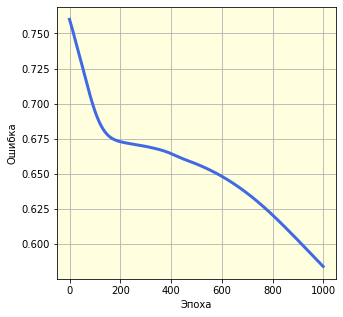

In [38]:
plt.figure(figsize=(5, 5))  
ax = plt.axes()
ax.set(facecolor = "LightYellow")
plt.plot(list(range(len(total_err))), total_err, color='RoyalBlue', linewidth=3,
          markeredgewidth=2, markersize=10, markevery=5)                                                
plt.xlabel('Эпоха')                
plt.ylabel('Ошибка')  
plt.grid()                    

In [39]:
for id in range(10):
  input = np.reshape(x_test[id], (len(x_test[id]), 1))
  layer_1 = relu(np.dot(weights_i_h, input)) 
  output = softmax(np.dot(weights_h_o, layer_1).T).T 
  error = np.sum((np.reshape(y_test[id], (len(y_test[id]), 1)) - output) ** 2)
  print(f'OUT: {np.around(output.T, decimals=2)}, ERR: {np.around(error, decimals=2)}, GOAL: {y_test[id]}')

OUT: [[0.04 0.17 0.26 0.53]], ERR: 0.32, GOAL: [0 0 0 1]
OUT: [[0.09 0.15 0.34 0.43]], ERR: 0.47, GOAL: [0 0 0 1]
OUT: [[0.02 0.15 0.32 0.52]], ERR: 1.1, GOAL: [0 1 0 0]
OUT: [[0.02 0.12 0.27 0.59]], ERR: 0.25, GOAL: [0 0 0 1]
OUT: [[0.13 0.05 0.3  0.51]], ERR: 0.35, GOAL: [0 0 0 1]
OUT: [[0.49 0.02 0.19 0.3 ]], ERR: 0.38, GOAL: [1 0 0 0]
OUT: [[0.42 0.01 0.18 0.39]], ERR: 0.53, GOAL: [1 0 0 0]
OUT: [[0.1  0.14 0.27 0.49]], ERR: 0.36, GOAL: [0 0 0 1]
OUT: [[0.33 0.03 0.25 0.38]], ERR: 0.66, GOAL: [1 0 0 0]
OUT: [[0.05 0.22 0.33 0.39]], ERR: 0.87, GOAL: [0 1 0 0]


In [40]:
def get_weights(hidden_size=10):
  np.random.seed(40)
  weights_i_h = np.random.random(size=(hidden_size, len(x_train[0]))) - 0.5
  weights_h_o = np.random.random(size=(len(y_test[0]), hidden_size)) - 0.5
  return weights_i_h, weights_h_o

In [46]:
total_err_hs_dict = {}
for hidden_size in range (1, 26, 3):
  weights_i_h, weights_h_o = get_weights(hidden_size)
  alpha = 0.025
  iterations = 500
  total_err = []

  for iteration in range(iterations):
    total_err_iter = []
    error = 0
    for id in range(len(x_train)):
      input = np.reshape(x_train[id], (len(x_train[id]), 1))
      layer_1 = relu(np.dot(weights_i_h, input))
      output = softmax(np.dot(weights_h_o, layer_1).T).T 
      error = np.sum((np.reshape(y_train[id], (len(y_train[id]), 1)) - output) ** 2)
      delta_out = np.reshape(y_train[id], (len(y_train[id]), 1)) - output
      delta_h = np.dot(weights_h_o.T, delta_out) * relu2deriv(layer_1)
      weights_h_o += alpha * np.dot(delta_out, layer_1.T)
      weights_i_h += alpha * np.dot(delta_h, input.T)

      total_err_iter.append(error)

    if iteration == iterations-1:
      print(f'H_S: {hidden_size}, ITER: {iteration}, ERR: {np.array(total_err_iter).mean()}')
    total_err.append(np.array(total_err_iter).mean())
  total_err_hs_dict[hidden_size] = total_err

H_S: 1, ITER: 499, ERR: 0.6928729148826976
H_S: 4, ITER: 499, ERR: 0.35894444928443453
H_S: 7, ITER: 499, ERR: 0.18167199886766194
H_S: 10, ITER: 499, ERR: 0.0026849589063710597
H_S: 13, ITER: 499, ERR: 0.003289756542620986
H_S: 16, ITER: 499, ERR: 0.0025944865931223386
H_S: 19, ITER: 499, ERR: 0.002918274068747505
H_S: 22, ITER: 499, ERR: 0.0030808779673695322
H_S: 25, ITER: 499, ERR: 0.002973987369250423


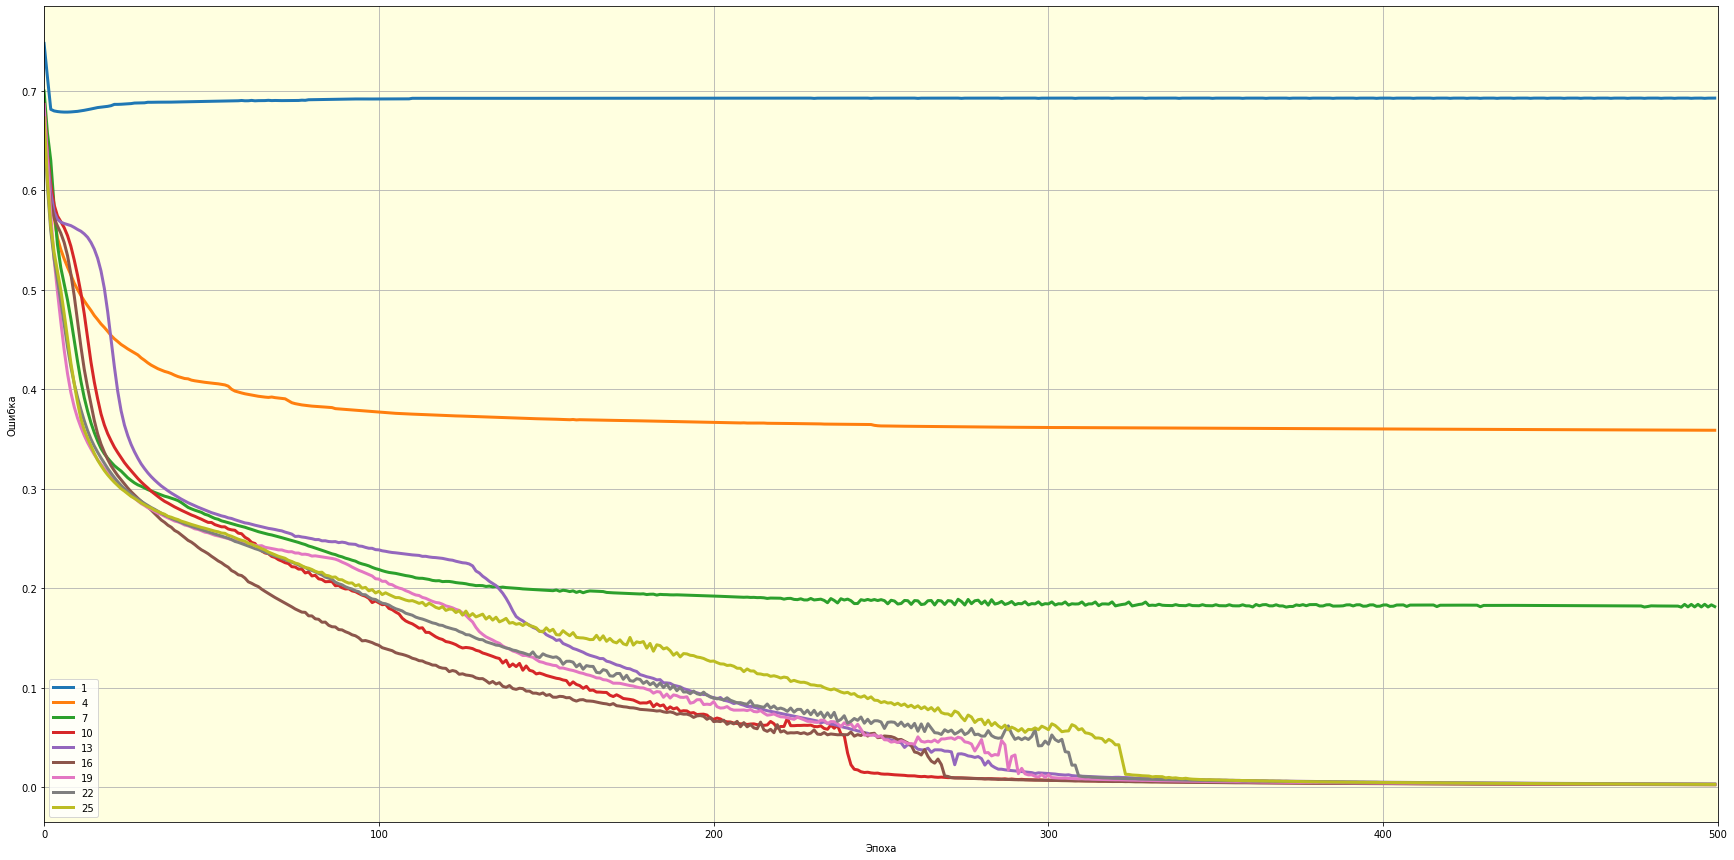

In [47]:
plt.figure(figsize=(30, 15))  
ax = plt.axes()
ax.set(facecolor = "LightYellow")
for k, v in total_err_hs_dict.items():
  plt.plot(list(range(len(v))), v, label=str(k), linewidth=3)
  plt.legend()

plt.xlabel('Эпоха')                    
plt.ylabel('Ошибка') 
plt.xlim(0, 500) 
plt.grid()   
plt.show()                 

In [48]:
total_err_alpha_dict = {}
for alpha in [0.5, 0.25, 0.1, 0.05, 0.25, 0.01, 0.005, 0.0025, 0.001]:
  weights_i_h, weights_h_o = get_weights(16)
  iterations = 500
  total_err = []

  for iteration in range(iterations):
    total_err_iter = []
    error = 0
    for id in range(len(x_train)):
      input = np.reshape(x_train[id], (len(x_train[id]), 1))
      layer_1 = relu(np.dot(weights_i_h, input))
      output = softmax(np.dot(weights_h_o, layer_1).T).T 
      error = np.sum((np.reshape(y_train[id], (len(y_train[id]), 1)) - output) ** 2)
      delta_out = np.reshape(y_train[id], (len(y_train[id]), 1)) - output
      delta_h = np.dot(weights_h_o.T, delta_out) * relu2deriv(layer_1)
      weights_h_o += alpha * np.dot(delta_out, layer_1.T)
      weights_i_h += alpha * np.dot(delta_h, input.T)

      total_err_iter.append(error)

    if iteration == iterations-1:
      print(f'ALPHA: {alpha}, ITER: {iteration}, ERR: {np.array(total_err_iter).mean()}')
    total_err.append(np.array(total_err_iter).mean())
  total_err_alpha_dict[alpha] = total_err

ALPHA: 0.5, ITER: 499, ERR: 0.693691946037378
ALPHA: 0.25, ITER: 499, ERR: 0.4947000020380367
ALPHA: 0.1, ITER: 499, ERR: 0.2641337103276195
ALPHA: 0.05, ITER: 499, ERR: 0.1501621987537111
ALPHA: 0.25, ITER: 499, ERR: 0.4947000020380367
ALPHA: 0.01, ITER: 499, ERR: 0.011616236820988217
ALPHA: 0.005, ITER: 499, ERR: 0.05865672536716335
ALPHA: 0.0025, ITER: 499, ERR: 0.20724717609495474
ALPHA: 0.001, ITER: 499, ERR: 0.32153238030039233


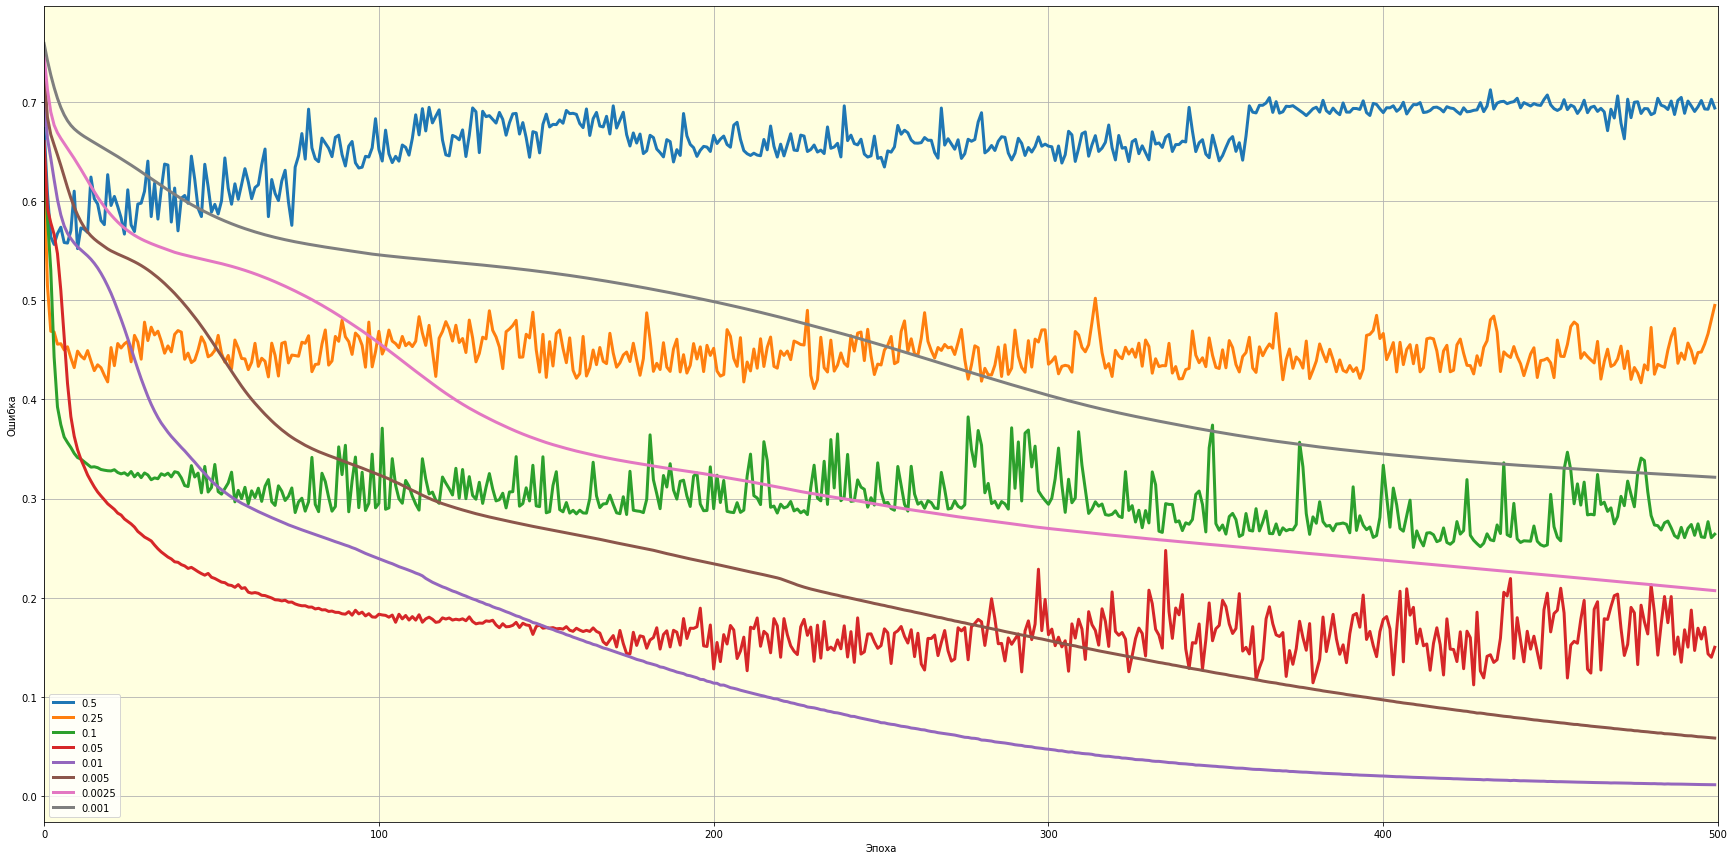

In [50]:
plt.figure(figsize=(30, 15))  
ax = plt.axes()
ax.set(facecolor = "LightYellow")
for k, v in total_err_alpha_dict.items():
  plt.plot(list(range(len(v))), v, label=str(k), linewidth=3)
  plt.legend()

plt.xlabel('Эпоха')                    
plt.ylabel('Ошибка') 
plt.xlim(0, 500) 
plt.grid()   
plt.show() 